# KNOWLEDGE BASE APPROACH

In [1]:
import gym
import time
import matplotlib.pyplot as plt
from pyswip import Prolog
import IPython.display as display
from project_utils import *

MONSTER = ['giant', 'ettin', 'titan', 'minotaur', 'naga', 'lich', 'ogre', 'dragon', 'troll', 'Olog-hai'] #possible monsters in this environment

In [23]:
des_file = '''
MAZE: "mylevel", ' '
FLAGS:hardfloor,premapped
MESSAGE: "Welcome to MiniHack!"
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
...........
...........
...........
...........
...........
...........
...........
...........
...........
ENDMAP
$place = { (10,8),(0,8),(10,0) }
SHUFFLE: $place
REGION:(0,0,11,9),lit,"ordinary"
REPLACE_TERRAIN:(0,2,0,2), '.', 'T', 100%
REPLACE_TERRAIN:(1,2,1,2), '.', 'T', 100%
TERRAIN:randline (0,9),(11,0), 5, '.'
TERRAIN:randline (0,0),(11,9), 5, '.'
BRANCH:(0,0,0,0),(1,1,1,1)
STAIR:(0,8),down
'''

ENV = gym.make("MiniHack-Navigation-Custom-v0",des_file=des_file,
              observation_keys=('screen_descriptions','message','pixel','blstats'))

## Basic Movement
For the first milestone of the project, we used the "Mapped" environment of Hide n' Seek-that is, a game mode in which the map is fully known since the beginning, therefore not needing exploration.
The first thing we did, after setting up the environment and finding out a way to formulate and update perceptions from the game into the knowledge base, was to design and test the basic movement towards the goal. Since the project's bigger picture would have included a heuristic pathfinding solution, we kept the reasoning "step-by-step" in the Knowledge Base version, without using lists to build a path before even moving. To avoid the occurrence of loops (which manifested themselves in cases where the optimal path was blocked by trees or/and walls, and the agent would walk back and forth over the same two cells), we "discouraged" him from walking over already-walked cells . Here's a test of the agent's movement optimality in a fully mapped environment, with no monsters.

KeyboardInterrupt: 

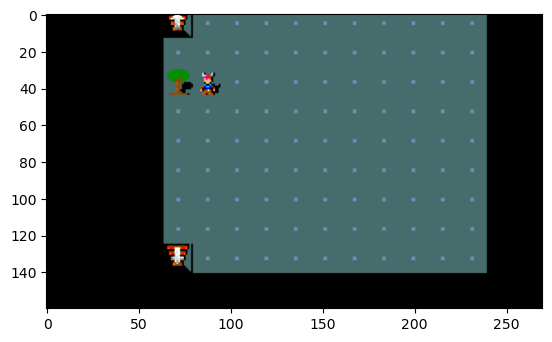

In [24]:
MAX_STEPS = 30
PATH = 'project_kb.pl'

evaluate(num_ep = 1, max_steps = MAX_STEPS, kb_path = PATH, monsters = MONSTER, env = ENV, speed = "slow")

In [ ]:
# Introducing monsters
